In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob

In [78]:
# specify data folder
path = "ParticipantJsons\*.json"

# create empty dataframe
df2 = pd.DataFrame()

# read every file name in folder
for filename in glob.glob(path):
    with open(filename, 'r') as file:
        # make json files parsable
        data = file.read()
    
        # read data per file
        participantdf = pd.read_json(data)
       

       # insert participant id in every line
        participantdf.insert(0, "Participant", [int(
            filename[28:29])] * participantdf.shape[0], True)
        df2 = df2._append(participantdf, ignore_index=True)


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\949404936.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  participantdf = pd.read_json(data)
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\949404936.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  participantdf = pd.read_json(data)
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\949404936.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  participantdf = pd.read_json(data)
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\949404936.py:15: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. 

In [79]:
df2

,Participant,Items
0,1,"{'ExhibitID': 'Tutorial2', 'validInteraction':..."
1,1,"{'ExhibitID': 'Tutorial1', 'validInteraction':..."
2,1,"{'ExhibitID': 'Tutorial2', 'validInteraction':..."
3,1,"{'ExhibitID': 'Tutorial2', 'validInteraction':..."
4,1,"{'ExhibitID': 'Tutorial2', 'validInteraction':..."
...,...,...
88,9,"{'ExhibitID': 'Bench', 'validInteraction': Fal..."
89,9,"{'ExhibitID': 'Table', 'validInteraction': Tru..."
90,9,"{'ExhibitID': 'Fireplace', 'validInteraction':..."
91,9,"{'ExhibitID': 'Tapestries', 'validInteraction'..."


In [80]:
# column names
columns = ['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime']

# create final empty DataFrame
df = pd.DataFrame()

# append all values to final DataFrame
for i in range (len(df2)):
    temp = pd.DataFrame(df2["Items"][i], index=[i], columns=columns)
    df = df._append(temp)
    i += 1

In [81]:
# drop all columns except participant
df2 = df2.drop("Items", axis=1)

# switching participant 2 for 3
df2["Participant"].replace(2, 3, inplace=True)

# create extra rows for missing data points (participant 3 - bench)
temp = pd.DataFrame([3], index = [17], columns=["Participant"])

# create missing 'bench' data for participant 3
temps = pd.DataFrame({'ExhibitID':"Bench", 'validInteraction':True, 'MaxExplanation':52.297142,
'ListenedTime':51.2971424364}, index=[17], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

# insert extra rows into final dataframe
df = pd.concat([df.iloc[:17], temps, df.iloc[17:]]).reset_index(drop=True)

# insert extra rows into participant only dataframe
df2 = pd.concat([df2.iloc[:17], temp, df2.iloc[17:]]).reset_index(drop=True)



In [82]:
## adding data for participant 2

# create rows and insert into participant only dataframe
rows = pd.DataFrame([2 for i in range(10)], index = list(range(15,25)), columns = ["Participant"])

df2 = pd.concat([df2.iloc[:14], rows, df2.iloc[14:]]).reset_index(drop=True)

# create participant data
part1 = pd.DataFrame({'ExhibitID':"Tutorial1", 'validInteraction':False, 'MaxExplanation':12.800000190734863,
'ListenedTime':0}, index=[14], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part2 = pd.DataFrame({'ExhibitID':"Tutorial2", 'validInteraction':True, 'MaxExplanation':12.800000,
'ListenedTime':12.864789962768555}, index=[15], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part3 = pd.DataFrame({'ExhibitID':"Bench", 'validInteraction':False, 'MaxExplanation':52.297142,
'ListenedTime':30}, index=[16], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part5 = pd.DataFrame({'ExhibitID':"Cabinet", 'validInteraction':True, 'MaxExplanation':29.126530,
'ListenedTime':12.864789962768555}, index=[18], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part6 = pd.DataFrame({'ExhibitID':"Pamona", 'validInteraction':False, 'MaxExplanation':69.067757,
'ListenedTime':30}, index=[19], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part7 = pd.DataFrame({'ExhibitID':"Candelabras", 'validInteraction':True, 'MaxExplanation':7.262041,
'ListenedTime':12.864789962768555}, index=[20], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part8 = pd.DataFrame({'ExhibitID':"Fireplace", 'validInteraction':False, 'MaxExplanation':42.866940,
'ListenedTime':30}, index=[21], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part9 = pd.DataFrame({'ExhibitID':"Piano", 'validInteraction':True, 'MaxExplanation':22.282450,
'ListenedTime':12.864789962768555}, index=[22], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part10 = pd.DataFrame({'ExhibitID':"Heating", 'validInteraction':True, 'MaxExplanation':18.860409,
'ListenedTime':12.864789962768555}, index=[23], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

part12 = pd.DataFrame({'ExhibitID':"Tapestries", 'validInteraction':False, 'MaxExplanation':28.029388,
'ListenedTime':20}, index=[25], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

# concatenate all new data into one dataframe for participant 2
participant2 = pd.concat([part1, part2, part3, part12, part5, part6, part7, part8, part9, part10])

# insert new participant 2 dataframe into final dataframe
df = pd.concat([df.iloc[:14], participant2, df.iloc[14:]]).reset_index(drop=True)

In [83]:
# insert missing data point as before (participant 6 - Pamona)
participant6 = pd.DataFrame({'ExhibitID':"Pamona", 'validInteraction':False, 'MaxExplanation':69.067757,
'ListenedTime':39}, index=[62], columns=['ExhibitID', 'validInteraction', 'MaxExplanation', 'ListenedTime'])

df = pd.concat([df.iloc[:62], participant6, df.iloc[62:]]).reset_index(drop=True)

rows6 = pd.DataFrame([6], index = [62], columns = ["Participant"])

df2 = pd.concat([df2.iloc[:62], rows6, df2.iloc[62:]]).reset_index(drop=True)

In [84]:
# join both participant only and final dataframes
df = df2.join(df)

In [85]:
df

,Participant,ExhibitID,validInteraction,MaxExplanation,ListenedTime
0,1,Tutorial2,True,12.800000,12.864790
1,1,Tutorial1,True,28.656326,28.668814
2,1,Tutorial2,False,12.800000,1.317247
3,1,Tutorial2,False,12.800000,2.506509
4,1,Tutorial2,False,12.800000,7.698429
...,...,...,...,...,...
100,9,Bench,False,52.297142,37.718315
101,9,Table,True,17.319183,17.322046
102,9,Fireplace,False,42.866940,28.807505
103,9,Tapestries,False,28.029388,22.139153


In [86]:
# drop tutorial values from dataframe
df = df.drop(df[df.ExhibitID == "Tutorial1"].index).reset_index(drop=True)
df = df.drop(df[df.ExhibitID == "Tutorial2"].index).reset_index(drop=True)


#### Drop all other incorrect or extra values from dataframe

In [87]:
# participant 4
df = df.drop(30).reset_index().drop('index', axis=1).reset_index(drop=True)

In [88]:
df = df.drop(36).reset_index().drop('index', axis=1).reset_index(drop=True)

In [89]:
# participant 7
df = df.drop(53).reset_index().drop('index', axis=1).reset_index(drop=True)

In [90]:
df = df.drop(53).reset_index().drop('index', axis=1).reset_index(drop=True)

In [91]:
df = df.drop(55).reset_index().drop('index', axis=1).reset_index(drop=True)

In [92]:
df = df.drop(56).reset_index().drop('index', axis=1).reset_index(drop=True)

In [93]:
df = df.drop(59).reset_index().drop('index', axis=1).reset_index(drop=True)

In [94]:
df = df.drop(59).reset_index().drop('index', axis=1).reset_index(drop=True)

In [95]:
# participant 9
df = df.drop(74).reset_index().drop('index', axis=1).reset_index(drop=True)

In [96]:
# adjust 'validInteraction' nad 'ListenedTime' values that are wrong in dataframe

## participant 1

# Billiard
df.loc[2, ("validInteraction")] = True
df.loc[2, ("ListenedTime")] = 21.170612

## participant 2

# Candlelabras
df.loc[13, ("ListenedTime")] = 7

## participant 3

# Cabinet
df.loc[21, ("validInteraction")] = True
df.loc[21, ("ListenedTime")] = 29.170612

## participant 4

# Bench
df.loc[28, ("ListenedTime")] = 18

# Tapestries
df.loc[30, ("ListenedTime")] = 17

# Table
df.loc[31, ("ListenedTime")] = 16
df.loc[31, ("validInteraction")] = True

# Pamona
df.loc[33, ("ListenedTime")] = 69
df.loc[33, ("validInteraction")] = True

# Billiard
df.loc[34, ("ListenedTime")] = 14

# Cabinet
df.loc[35, ("validInteraction")] = True
df.loc[35, ("ListenedTime")] = 29.170612

## participant 5

# Pamona
df.loc[36, ("ListenedTime")] = 69
df.loc[36, ("validInteraction")] = True

# Bench
df.loc[37, ("validInteraction")] = True
df.loc[37, ("ListenedTime")] = 51.170612

# Candlelabras
df.loc[38, ("ListenedTime")] = 7
df.loc[38, ("validInteraction")] = True

# Billiard
df.loc[39, ("validInteraction")] = True
df.loc[39, ("ListenedTime")] = 23.170612

# Cabinet
df.loc[40, ("ListenedTime")] = 15

# Table
df.loc[41, ("ListenedTime")] = 13
df.loc[41, ("validInteraction")] = False

# Fireplace
df.loc[42, ("ListenedTime")] = 15

# Heating
df.loc[43, ("validInteraction")] = True
df.loc[43, ("ListenedTime")] = 18

# Piano
df.loc[44, ("validInteraction")] = True
df.loc[44, ("ListenedTime")] = 22.170612

# Tapestries
df.loc[45, ("validInteraction")] = True
df.loc[45, ("ListenedTime")] = 28.170612

## participant 6

# Everything but Pamona
df.loc[[47,48,49,50,51,52], ("validInteraction")] = True

# Bench
df.loc[47, ("ListenedTime")] = 51.170612

# Candlelabras
df.loc[48, ("ListenedTime")] = 7

# Cabinet
df.loc[49, ("ListenedTime")] = 29

# Piano
df.loc[50, ("ListenedTime")] = 22

# Tapestries
df.loc[51, ("ListenedTime")] = 28

# Fireplace
df.loc[52, ("ListenedTime")] = 42

## participant 7

# Everything
df.loc[[53,54,55,56,57,58,59], ("validInteraction")] = True

# Bench
df.loc[53, ("ListenedTime")] = 52

# Pamona
df.loc[54, ("ListenedTime")] = 69

# Candlelabras
df.loc[55, ("ListenedTime")] = 7

# Billiard
df.loc[56, ("ListenedTime")] = 22

# Fireplace
df.loc[57, ("ListenedTime")] = 42

# Piano
df.loc[58, ("ListenedTime")] = 22

# Tapestries
df.loc[59, ("ListenedTime")] = 28

## participant 8

# Everything
df.loc[[60,61,62,63,64,65,66,67,68,69], ("validInteraction")] = True

# Pamona
df.loc[62, ("ListenedTime")] = 69

# Billiard
df.loc[63, ("ListenedTime")] = 22

# Cabinet
df.loc[64, ("ListenedTime")] = 29

## participant 9

# Bench & Fireplace
df.loc[[71,73], ("validInteraction")] = True

# Bench
df.loc[71, ("ListenedTime")] = 52

# Fireplace
df.loc[73, ("ListenedTime")] = 42

In [97]:
# Add condition column & assign conditions

df["Condition"] = 'None'

df.loc[df['Participant'] == 1, 'Condition'] = "Full Control"
df.loc[df['Participant'] == 3, 'Condition'] = "Full Control"
df.loc[df['Participant'] == 9, 'Condition'] = "Full Control"
df.loc[df['Participant'] == 2, 'Condition'] = "Partial Control"
df.loc[df['Participant'] == 5, 'Condition'] = "Partial Control"
df.loc[df['Participant'] == 8, 'Condition'] = "Partial Control"
df.loc[df['Participant'] == 4, 'Condition'] = "No Control"
df.loc[df['Participant'] == 6, 'Condition'] = "No Control"
df.loc[df['Participant'] == 7, 'Condition'] = "No Control"

In [98]:
df

,Participant,ExhibitID,validInteraction,MaxExplanation,ListenedTime,Condition
0,1,Cabinet,True,29.126530,29.209532,Full Control
1,1,Bench,True,52.297142,50.571640,Full Control
2,1,Billiard,True,23.170612,21.170612,Full Control
3,1,Pamona,True,69.067757,69.200035,Full Control
4,1,Billiard,True,23.170612,23.219006,Full Control
...,...,...,...,...,...,...
70,9,Candelabras,True,7.262041,7.282014,Full Control
71,9,Bench,True,52.297142,52.000000,Full Control
72,9,Table,True,17.319183,17.322046,Full Control
73,9,Fireplace,True,42.866940,42.000000,Full Control


In [99]:
# round digits to 2 decimal places
df = df.round(2)

In [100]:
for i in range(len(df)):
    if df.ListenedTime[i] > df.MaxExplanation[i]:
        df.ListenedTime[i] = df.MaxExplanation[i]
    print(i, df.ListenedTime[i] > df.MaxExplanation[i])

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\426516619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ListenedTime[i] = df.MaxExplanation[i]
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\426516619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ListenedTime[i] = df.MaxExplanation[i]
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\426516619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ListenedTi

In [153]:
df[df.Participant == 1]

,Participant,ExhibitID,validInteraction,MaxExplanation,ListenedTime,Condition
0,1,Cabinet,True,29.13,29.13,Full Control
1,1,Bench,True,52.30,50.57,Full Control
2,1,Billiard,True,23.17,21.17,Full Control
3,1,Pamona,True,69.07,69.07,Full Control
4,1,Billiard,True,23.17,23.17,Full Control
5,1,Candelabras,True,7.26,7.26,Full Control
6,1,Fireplace,True,42.87,42.87,Full Control
7,1,Tapestries,True,28.03,28.03,Full Control
8,1,Table,True,17.32,17.32,Full Control


In [189]:
# create seperate dataframe per condition group
fullC = df[df["Condition"] == "Full Control"].groupby(['Participant', 'ExhibitID']).sum().round(2)
partialC = df[df["Condition"] == "Partial Control"].groupby(['Participant', 'ExhibitID']).sum().round(2)
noC = df[df["Condition"] == "No Control"].groupby(['Participant', 'ExhibitID']).sum().round(2)

In [190]:
# fix values for listenedTime and Codition columns where exhibits were visited more than once
fullC['Condition'] = 'Full Control'
fullC.ListenedTime[1][1] = fullC.ListenedTime[1][1]/2

noC['Condition'] = 'No Control'
noC.ListenedTime[4][1] = round(noC.ListenedTime[4][1]/2, 2)

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\2022029035.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fullC.ListenedTime[1][1] = fullC.ListenedTime[1][1]/2
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\2022029035.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fullC.ListenedTime[1][1] = fullC.ListenedTime[1][1]/2
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\2022029035.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

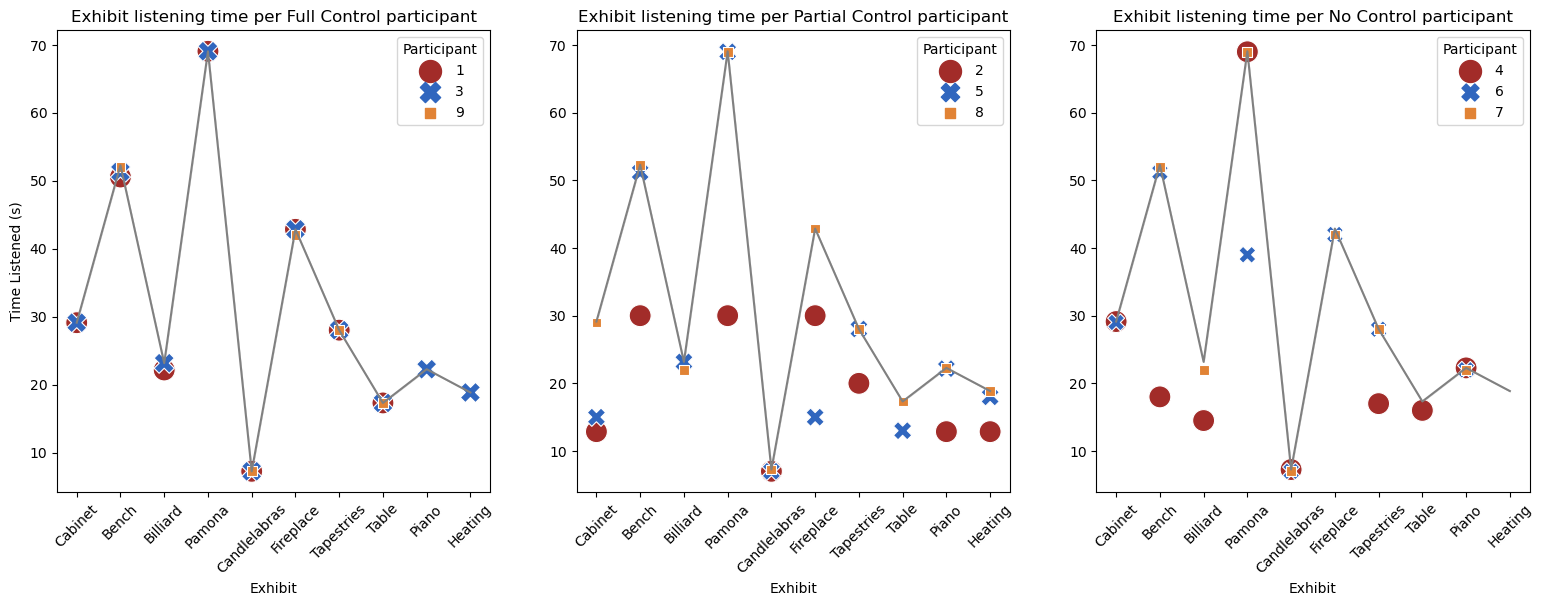

In [193]:
# scatter plot of listened time to exhibit per condition

fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(19,6))

# Full Control
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[0], color='grey')
sns.scatterplot(data=fullC, x='ExhibitID', y='ListenedTime', hue='Participant', style='Participant', size='Participant',
                sizes=(250,100), ax=ax[0], palette=['#a22c29','#3066be','#e18335'], legend='full')
ax[0].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[0].set(title='Exhibit listening time per Full Control participant',ylabel='Time Listened (s)', xlabel='Exhibit')

# Partial Control
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[1], color='grey')
sns.scatterplot(data=partialC, x='ExhibitID', y='ListenedTime', hue='Participant', style='Participant', size='Participant',
                sizes=(250,100), ax=ax[1], palette=['#a22c29','#3066be','#e18335'], legend='full')
ax[1].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[1].set(title='Exhibit listening time per Partial Control participant', ylabel='', xlabel='Exhibit')

# No Control
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[2], color='grey')
sns.scatterplot(data=noC, x='ExhibitID', y='ListenedTime', hue='Participant', style='Participant', size='Participant',
                sizes=(250,100), ax=ax[2], palette=['#a22c29','#3066be','#e18335'], legend='full')
ax[2].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[2].set(title='Exhibit listening time per No Control participant', ylabel='', xlabel='Exhibit')

plt.savefig('Plots\Condition_listening.png')
plt.show()

c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

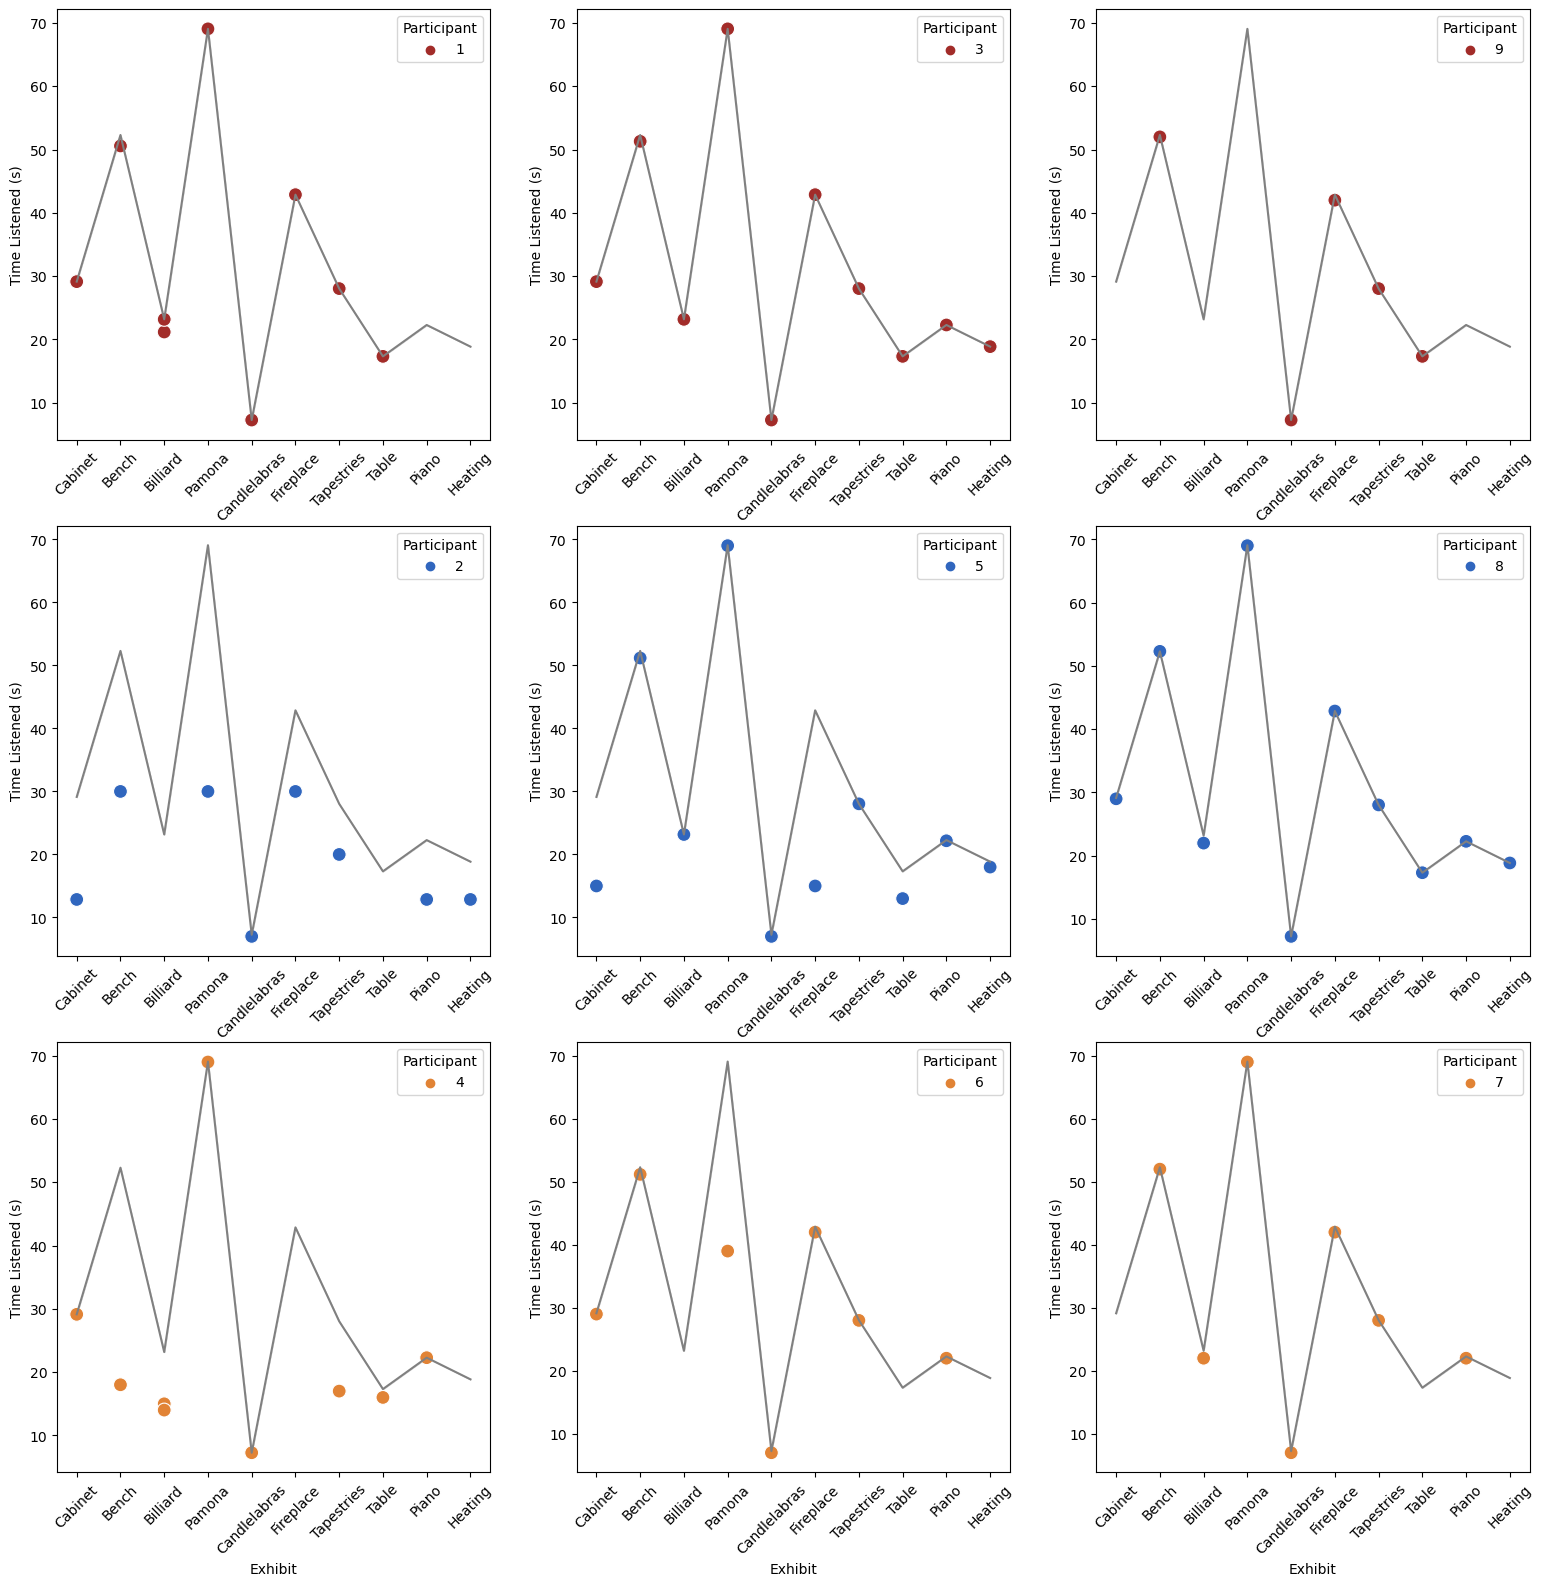

In [194]:
# scatter plot of each participant's listened time to exhibit per condition
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(19,19))

## Full Control

# participant 1
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[0,0], color='grey')
sns.scatterplot(data=df[df['Participant']==1], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#a22c29'], ax=ax[0,0])
ax[0,0].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[0,0].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 3
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[0,1], color='grey')
sns.scatterplot(data=df[df['Participant']==3], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#a22c29'], ax=ax[0,1])
ax[0,1].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[0,1].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 9
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[0,2], color='grey')
sns.scatterplot(data=df[df['Participant']==9], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#a22c29'], ax=ax[0,2])
ax[0,2].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[0,2].set(ylabel='Time Listened (s)', xlabel='Exhibit')


## Partial Control

# participant 2
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[1,0], color='grey')
sns.scatterplot(data=df[df['Participant']==2], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#3066be'], ax=ax[1,0])
ax[1,0].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[1,0].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 5
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[1,1], color='grey')
sns.scatterplot(data=df[df['Participant']==5], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#3066be'], ax=ax[1,1])
ax[1,1].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[1,1].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 8
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[1,2], color='grey')
sns.scatterplot(data=df[df['Participant']==8], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#3066be'], ax=ax[1,2])
ax[1,2].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[1,2].set(ylabel='Time Listened (s)', xlabel='Exhibit')

## No Control

# participant 4
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[2,0], color='grey')
sns.scatterplot(data=df[df['Participant']==4], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#e18335'], ax=ax[2,0])
ax[2,0].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[2,0].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 6
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[2,1], color='grey')
sns.scatterplot(data=df[df['Participant']==6], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#e18335'], ax=ax[2,1])
ax[2,1].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[2,1].set(ylabel='Time Listened (s)', xlabel='Exhibit')

# participant 7
sns.lineplot(data=df, x="ExhibitID", y="MaxExplanation", ax=ax[2,2], color='grey')
sns.scatterplot(data=df[df['Participant']==7], x='ExhibitID', y='ListenedTime', s=100, hue='Participant', palette=['#e18335'], ax=ax[2,2])
ax[2,2].set_xticklabels(labels=['Cabinet', 'Bench', 'Billiard', 'Pamona', 'Candlelabras', 'Fireplace', 'Tapestries', 'Table', 'Piano', 'Heating'], rotation=45)
ax[2,2].set(ylabel='Time Listened (s)', xlabel='Exhibit')

plt.savefig('Plots\Participant_listening.png')
plt.show()

In [195]:
# Add column to dataframe for percentage of exhibit explanation listened to by participants
ListenedPercentage = (df['ListenedTime'] / df['MaxExplanation'] * 100).round(0)

for i in range (len(ListenedPercentage)):
    if ListenedPercentage[i] > 100:
        ListenedPercentage[i]=100

df['ListenedPercentage'] = ListenedPercentage

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\1585461509.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Participant', y='ListenedPercentage', hue='Condition',  order=[1,3,9,2,5,8,4,6,7], ci=None, palette=['#a22c29','#3066be','#e18335'])
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remove

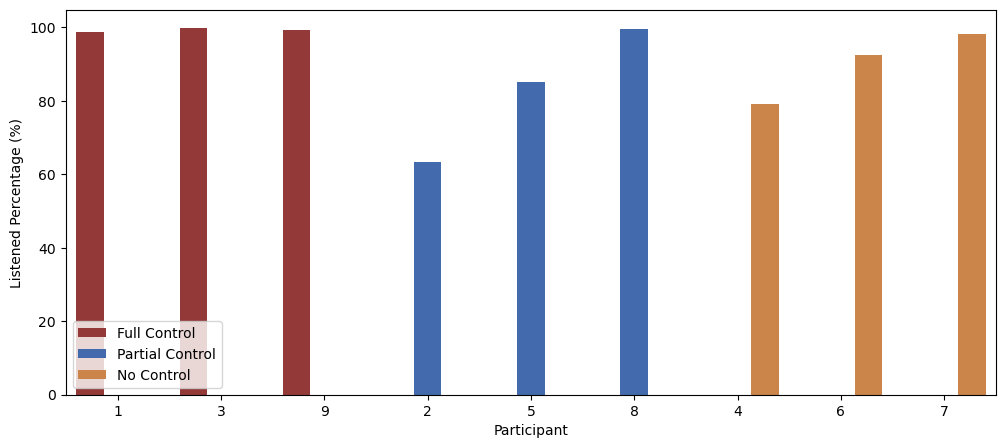

In [196]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,5))

sns.barplot(data=df, x='Participant', y='ListenedPercentage', hue='Condition',  order=[1,3,9,2,5,8,4,6,7], ci=None, palette=['#a22c29','#3066be','#e18335'])
#sns.boxplot(data=df, x='Participant', y='ListenedPercentage', order=[1,3,9,2,5,8,4,6,7], palette=['brown','orange','green'],
           # hue='Condition', dodge=False)
ax.legend(loc='lower left')
#ax.set(title='Percentage of Exhibit explanations listened to per participant', ylabel='Percentage Listened (%)')
ax.set(ylabel='Listened Percentage (%)', xlabel='Participant')

plt.savefig('Plots\Percentile.png')
plt.show()


C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_23044\1441618321.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=new, x='Participant', y='NumExhibits', hue='Condition',  order=[1,3,9,2,5,8,4,6,7], ci=None, palette=['#a22c29','#3066be','#e18335'])
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Fatemeh\Anaconda3\envs\ds\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, Exte

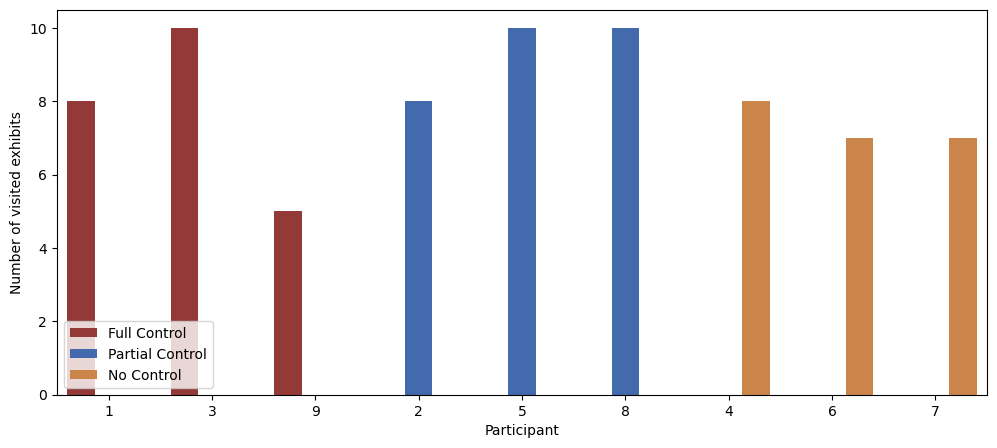

In [198]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,5))

new = {'Condition' : ['Full Control','Full Control','Full Control',
                                'Partial Control','Partial Control','Partial Control',
                                'No Control','No Control','No Control'],
                  'Participant' : [1,3,9,
                                  2,5,8,
                                  4,6,7],
                  'NumExhibits' : [8,10,5,
                                  8,10,10,
                                  8,7,7]}

sns.barplot(data=new, x='Participant', y='NumExhibits', hue='Condition',  order=[1,3,9,2,5,8,4,6,7], ci=None, palette=['#a22c29','#3066be','#e18335'])
#sns.boxplot(data=df, x='Participant', y='ListenedPercentage', order=[1,3,9,2,5,8,4,6,7], palette=['brown','orange','green'],
           # hue='Condition', dodge=False)
ax.legend(loc='lower left')
#ax.set(title='Percentage of Exhibit explanations listened to per participant', ylabel='Percentage Listened (%)')
ax.set(ylabel='Number of visited exhibits', xlabel='Participant')

plt.savefig('Plots\\Number of visited exhibits.png')
plt.show()


In [199]:
df["NumExhibits"] = 'None'

df.loc[df['Participant'] == 1, 'NumExhibits'] = "Full Control"
df.loc[df['Participant'] == 2, 'NumExhibits'] = "Full Control"
df.loc[df['Participant'] == 3, 'NumExhibits'] = "Full Control"
df.loc[df['Participant'] == 4, 'NumExhibits'] = "Partial Control"
df.loc[df['Participant'] == 5, 'NumExhibits'] = "Partial Control"
df.loc[df['Participant'] == 6, 'NumExhibits'] = "Partial Control"
df.loc[df['Participant'] == 7, 'NumExhibits'] = "No Control"
df.loc[df['Participant'] == 8, 'NumExhibits'] = "No Control"
df.loc[df['Participant'] == 9, 'NumExhibits'] = "No Control"
        

In [200]:
df["NumExhibits"] = 'None'

for i in range(1,10):
    df.loc[df['Participant'] == i, 'NumExhibits'] = len(df[df['Participant']==i])

In [201]:
df.to_csv('intData_hri.csv')

In [202]:
df[20:]

,Participant,ExhibitID,validInteraction,MaxExplanation,ListenedTime,Condition,ListenedPercentage,NumExhibits
20,3,Pamona,True,69.07,69.07,Full Control,100.0,10
21,3,Cabinet,True,29.13,29.13,Full Control,100.0,10
22,3,Fireplace,True,42.87,42.87,Full Control,100.0,10
23,3,Table,True,17.32,17.32,Full Control,100.0,10
24,3,Piano,True,22.28,22.28,Full Control,100.0,10
25,3,Tapestries,True,28.03,28.03,Full Control,100.0,10
26,3,Heating,True,18.86,18.86,Full Control,100.0,10
27,4,Billiard,False,23.17,14.99,No Control,65.0,9
28,4,Bench,False,52.30,18.00,No Control,34.0,9
29,4,Piano,True,22.28,22.28,No Control,100.0,9
